<a href="https://www.kaggle.com/code/yousefgomaa43/nn-arabic-handwriting-320210207?scriptVersionId=155941249" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div> <center> <b> NN Arabic Handwriting Recognition </b> </center> </div>

## <b> Credentials: </b> (E-JUST Submission)
- Name: Yousef Ibrahim Gomaa Mahmoud
- ID: 320210207
- Group: 1
- Section: AID 3

## <b> Notebook Workflow: </b>
- Environment Setup
- Data Pre-processing
- Data Visualization
- Model Definition
- Training the Model
- Prediction

## <b> Introduction: </b>
<p> In this notebook, a model is to be trained to <b> recognize/classify arabic letters </b> using a convolutional neural network (CNN) through Keras, a TensorFlow tool. </p>

## <b> Dataset: </b>
https://www.kaggle.com/competitions/arabic-letters-classification

## Environment Setup:
### Importing Packages

In [1]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### GPU Checkup:
Kaggle provides 2 GPUs which are relied upon heavily during the training phase.

In [2]:
for device in tf.config.list_physical_devices():
    print(": {}".format(device.name))

: /physical_device:CPU:0
: /physical_device:GPU:0
: /physical_device:GPU:1


### Loading the Dataset(s):

In [3]:
datasets = ['/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/train',\
            '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset/test',
           '/kaggle/input/arabic-letters-classification/Final_Arabic_Alpha_dataset/Final_Arabic_Alpha_dataset']
NUM_CLASS = 65
IMAGE_SIZE = (128,128)
BATCH_SIZE = 512
SEED = 43
EPOCHS = 20
LABEL_NAMES = [i for i in range(NUM_CLASS)]

- There are 65 classes to classify into (0-64)
- Images must be resized to a consistent size in order to train properly.

In [4]:
str = "user001_heh_middle_042.png"
str[8:18]

'heh_middle'

## Data Pre-processing:
Splitting training data into 'Training' and 'Validation' for the model to train on.

In [5]:
train_images = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    color_mode='grayscale',
    label_mode="categorical",
    subset="training",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)


Found 42559 files belonging to 65 classes.
Using 34048 files for training.


In [6]:
train_validation = tf.keras.utils.image_dataset_from_directory(
    datasets[0],
    validation_split=0.2,
    label_mode="categorical",
    color_mode='grayscale',
    subset="validation",
    shuffle=True,
    seed=SEED,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE)

Found 42559 files belonging to 65 classes.
Using 8511 files for validation.


In [7]:
# train_images = tf.keras.utils.image_dataset_from_directory(
#     datasets[0],
#     color_mode="grayscale",
#     label_mode="categorical",
#     shuffle=True,
#     image_size=IMAGE_SIZE,
#     batch_size=BATCH_SIZE)

## Data Visualization:

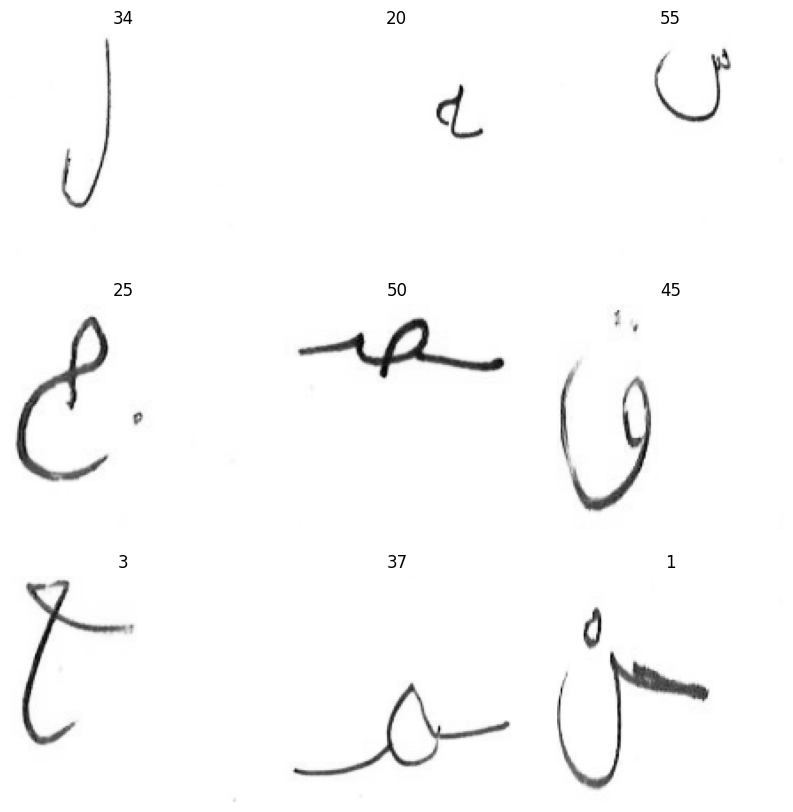

In [8]:
class_names = train_images.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)
        plt.title(class_names[np.where(np.array(labels[i])==1)[0][0]])
        plt.axis("off")

In [9]:
for images, labels in train_images:
    print(images.shape)
    print(labels.shape)
    break

(512, 128, 128, 1)
(512, 65)


- (Batch Size, Width, Height, 1 Image Tensor Channel (Greyscale))
- (Batch Size, Number of Classes)

## Model Definition:

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
#     tf.keras.layers.RandomZoom(height_factor=(-.3,.3), width_factor=(-.3,.3)),
#     tf.keras.layers.RandomRotation((-.3,.3)),
    tf.keras.layers.Conv2D(16, (5, 5), activation = 'relu', padding = 'same',  input_shape=(IMAGE_SIZE[0],IMAGE_SIZE[1],1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (5, 5), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (4, 4), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu', padding = 'same'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu',
                           kernel_regularizer=tf.keras.regularizers.l2(0.001)
                         ),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(NUM_CLASS, activation=tf.nn.softmax)
])

In [11]:
# model =  tf.keras.Sequential()

# pretrained_model = tf.keras.applications.ResNet50(include_top=False,
#                                                     input_shape = (IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
#                                                     classes=NUM_CLASS,
#                                                     pooling='max',
#                                                     weights='imagenet')
# for layer in pretrained_model.layers:
#     layer.trainable = False

# model.add(tf.keras.layers.Rescaling(1./255))
# model.add(tf.keras.layers.RandomZoom(height_factor=(-.2,.2), width_factor=(-.2,.2)))
# model.add(tf.keras.layers.RandomRotation((-.1,.1)))
# model.add(tf.keras.layers.Resizing(IMAGE_SIZE[0],IMAGE_SIZE[1]))
# model.add(pretrained_model)
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(512, activation='relu'))
# model.add(tf.keras.layers.Dense(NUM_CLASS, activation=tf.nn.softmax))

### Model Summary:

In [12]:
model.build(input_shape=(None, IMAGE_SIZE[0], IMAGE_SIZE[1], 1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 128, 128, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 128, 128, 16)      416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        3

### Model Optimization:

In [13]:
model.compile(optimizer = Adam(learning_rate= 0.001), loss = 'categorical_crossentropy', metrics=['accuracy'])

## Training the Model:

In [14]:
h1 = model.fit(train_images,
              validation_data=train_validation,
              epochs=EPOCHS)

Epoch 1/20
67/67 [==============================] - 69s 796ms/step - loss: 4.3056 - accuracy: 0.0296 - val_loss: 3.7101 - val_accuracy: 0.1054
Epoch 2/20
67/67 [==============================] - 17s 232ms/step - loss: 3.4417 - accuracy: 0.1398 - val_loss: 2.5559 - val_accuracy: 0.3090
Epoch 3/20
67/67 [==============================] - 17s 231ms/step - loss: 2.1422 - accuracy: 0.4079 - val_loss: 1.6006 - val_accuracy: 0.5389
Epoch 4/20
67/67 [==============================] - 17s 236ms/step - loss: 1.8519 - accuracy: 0.4905 - val_loss: 1.4077 - val_accuracy: 0.5997
Epoch 5/20
67/67 [==============================] - 19s 255ms/step - loss: 1.3303 - accuracy: 0.6220 - val_loss: 1.1888 - val_accuracy: 0.6604
Epoch 6/20
67/67 [==============================] - 18s 250ms/step - loss: 1.0386 - accuracy: 0.7078 - val_loss: 0.9946 - val_accuracy: 0.7195
Epoch 7/20
67/67 [==============================] - 18s 251ms/step - loss: 0.8782 - accuracy: 0.7525 - val_loss: 0.8789 - val_accuracy: 0.7560

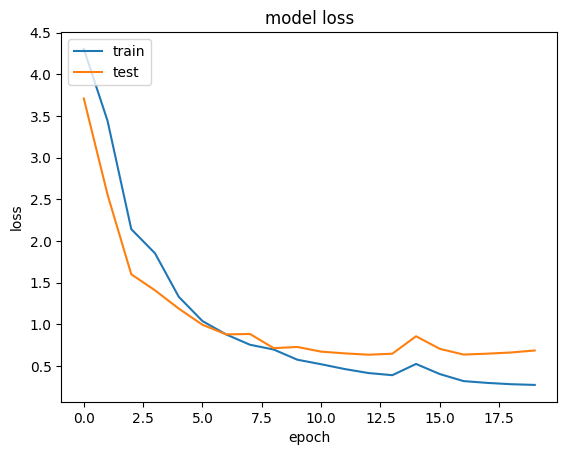

In [15]:
plt.plot(h1.history['loss'])
plt.plot(h1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Saving the Model:

Keras format:

In [16]:
# model.save('nn-arabic-handwriting-320210207.keras')

### Loading the Model:

In [17]:
# model = tf.keras.models.load_model('nn-arabic-handwriting-320210207.keras')

## Prediction:

Loading the 'Test' dataset:

In [18]:
test_images = tf.keras.utils.image_dataset_from_directory(
        datasets[1],
        labels=None,
        label_mode="categorical",
        color_mode='grayscale',
        shuffle=False,
        image_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE)

Found 10640 files belonging to 1 classes.


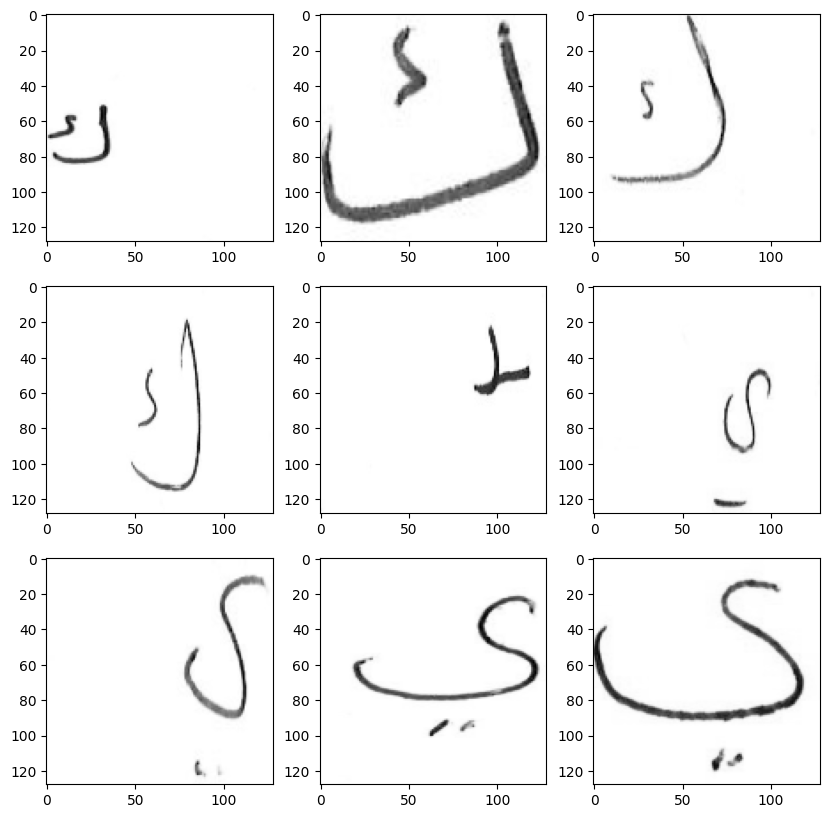

In [19]:
plt.figure(figsize=(10, 10))
for images in test_images.take(1): # Takes a batch and shows the first 9 images
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"), cmap=plt.cm.Greys_r)

In [20]:
for images in test_images:
    print(images.shape)
    break

(512, 128, 128, 1)


In [21]:
predictions = model.predict(test_images)

21/21 [==============================] - 15s 725ms/step


In [22]:
img_list = os.listdir(datasets[1])

In [23]:
labels_list = sorted(os.listdir(datasets[0]))
print(labels_list)

['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '7', '8', '9']


In [24]:
predictions[1][22]

0.9975776

## Making 'predictions.csv':

In [25]:
predictions.shape

(10640, 65)

In [26]:
df_predictions = pd.DataFrame(columns=['ID','Label'], dtype=(np.int32,np.int32))

predictions_mod = np.argmax(predictions, 1)

for idx,image in enumerate(sorted(img_list)):
#     print(image, predictions_mod[idx])
    df2 = pd.DataFrame([[int(image.split(".")[0]), int(labels_list[predictions_mod[idx]])]], columns=['ID','Label'])
    df_predictions = pd.concat([df_predictions, df2])

In [27]:
print(predictions_mod)

[22 22 22 ... 61 61 61]


In [28]:
df_predictions.head()

,ID,Label
0,0,29
0,1,29
0,10,29
0,100,29
0,1000,13


In [29]:
df_predictions.sort_values(by='ID', inplace=True)

In [30]:
df_predictions.reset_index(drop=True)

,ID,Label
0,0,29
1,1,29
2,2,29
3,3,29
4,4,34
...,...,...
10635,10635,9
10636,10636,9
10637,10637,9
10638,10638,9


In [31]:
df_predictions.to_csv('predictions.csv', index=False, header=True) 